In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

in_file = 'Data.csv'
full_data = pd.read_csv(in_file)
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,����ؼ�ʾ�,20161010,1,9,0,1,0,0,0,1,raiders
1,����ؼ�ʾ�,20161010,1,8,0,0,0,0,0,1,communication
2,Chivele-Ӱ,20161010,1,6,0,1,0,0,0,1,raiders
3,shjansh,20161010,1,8,0,0,0,0,1,1,communication
4,pƮ���Ҷ,20161010,1,14,0,1,0,0,1,1,activity


In [2]:
full_data['people']=full_data['people'].apply(lambda x:len(x))
full_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,326.000000,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,7.392638,2.016085e+07,2.840491,257.027607,0.030675,0.950920,0.325153,0.205521,0.453988
std,2.743239,2.126520e+02,6.645231,486.905364,0.172700,0.216367,0.469152,0.404703,0.498644
min,3.000000,2.016032e+07,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,2.016071e+07,0.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,2.016093e+07,1.000000,104.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,2.016101e+07,3.000000,237.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,15.000000,2.016101e+07,67.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
full_data['starttime']=full_data['starttime'].apply(lambda x:(x-20160000))

In [4]:
full_data.head()

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
0,10,1010,1,9,0,1,0,0,0,1,raiders
1,10,1010,1,8,0,0,0,0,0,1,communication
2,10,1010,1,6,0,1,0,0,0,1,raiders
3,7,1010,1,8,0,0,0,0,1,1,communication
4,9,1010,1,14,0,1,0,0,1,1,activity


In [65]:
act_data=full_data[(full_data['starttime']>=923)&(full_data['starttime']<=1010)]
act_data.describe()

,people,starttime,comments,pageviews,negative,neutral,official,hot,reply
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,8.346734,990.507538,2.879397,173.688442,0.035176,0.939698,0.125628,0.211055,0.522613
std,2.588900,31.348138,7.857669,486.795503,0.184689,0.238645,0.332266,0.409087,0.500748
min,3.000000,923.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1001.000000,0.000000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.000000,1003.000000,1.000000,44.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,10.000000,1009.000000,2.000000,129.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,15.000000,1010.000000,67.000000,4706.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
positive_data=act_data[(act_data['negative']==0)&(act_data['neutral']==0)]
positive_data

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
1,10,1010,1,8,0,0,0,0,0,1,communication
3,7,1010,1,8,0,0,0,0,1,1,communication
46,10,1009,1,6,0,0,0,0,1,1,communication
57,3,1009,1,8,0,0,0,0,1,1,raiders
128,6,1001,1,35,0,0,0,0,1,0,communication


In [67]:
negative_data=act_data[(act_data['negative']==1)]
negative_data

,people,starttime,comments,pageviews,negative,neutral,official,hot,new,reply,type
84,8,1006,3,20,1,0,0,0,1,0,help
90,8,1005,4,15,1,0,0,0,1,1,help
93,9,1004,3,64,1,0,0,0,0,1,help
98,8,1003,2,18,1,0,0,0,1,1,communication
123,10,1001,0,66,1,0,0,0,1,0,help
129,10,1001,0,37,1,0,0,0,0,0,communication
188,4,924,2,237,1,0,0,0,0,0,none


In [68]:
print act_data.shape[0]
print positive_data.shape[0]
print negative_data.shape[0]

199
5
7


In [154]:
emotion_data=pd.DataFrame({'positive':[5],'negative':[7],'neutral':[187]})
emotion_data

,negative,neutral,positive
0,7,187,5


Populating the interactive namespace from numpy and matplotlib


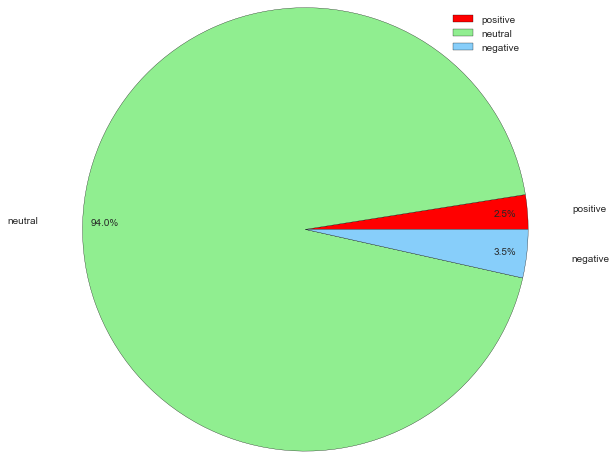

In [155]:
from matplotlib import pyplot as plt 
%pylab inline
#调节图形大小，宽，高
plt.figure(figsize=(8,8))
#定义饼状图的标签，标签是列表
labels = [u'positive',u'neutral',u'negative']
#每个标签占多大，会自动去算百分比
sizes = [5,187,7]
colors = ['red','lightgreen','lightskyblue']
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙
explode = (0,0,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.2,autopct = '%1.1f%%',shadow = False,
                                startangle = 0,pctdistance = 0.9)

#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

#改变文本的大小
#方法是把每一个text遍历。调用set_size方法设置它的属性
for t in l_text:
    t.set_size=(100)
for t in p_text:
    t.set_size=(80)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.legend()
plt.show()

In [80]:
dir={}
for i in range(923,1011):#take care there can be changed
    result=act_data[act_data['starttime']==i]
    if result.shape[0] != 0:
        #print i,result.shape[0]
        dir[i]=result.shape[0]
dir

{923: 8,
 924: 4,
 925: 1,
 926: 2,
 927: 1,
 928: 15,
 929: 5,
 930: 2,
 1001: 48,
 1002: 11,
 1003: 7,
 1004: 4,
 1005: 4,
 1006: 5,
 1007: 4,
 1008: 1,
 1009: 61,
 1010: 16}

In [115]:
starttime=[]
amount=[]
for i in range(923,1011):#take care there can be changed
    result=act_data[act_data['starttime']==i]
    if result.shape[0] != 0:
        starttime.append(i)
        amount.append(result.shape[0])
data={'starttime':starttime,'amount':amount}
starttime_data=pd.DataFrame(data)
starttime_data

,amount,starttime
0,8,923
1,4,924
2,1,925
3,2,926
4,1,927
5,15,928
6,5,929
7,2,930
8,48,1001
9,11,1002


Populating the interactive namespace from numpy and matplotlib


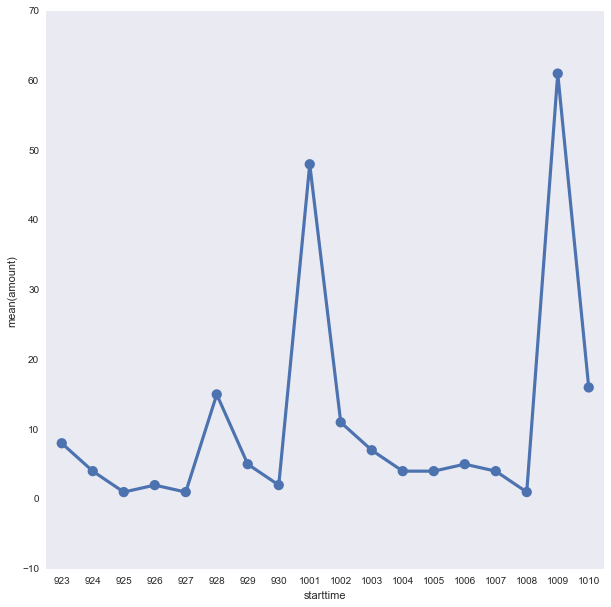

In [148]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=(10,10))
sns.pointplot(x='starttime',y='amount',data=starttime_data)

Populating the interactive namespace from numpy and matplotlib


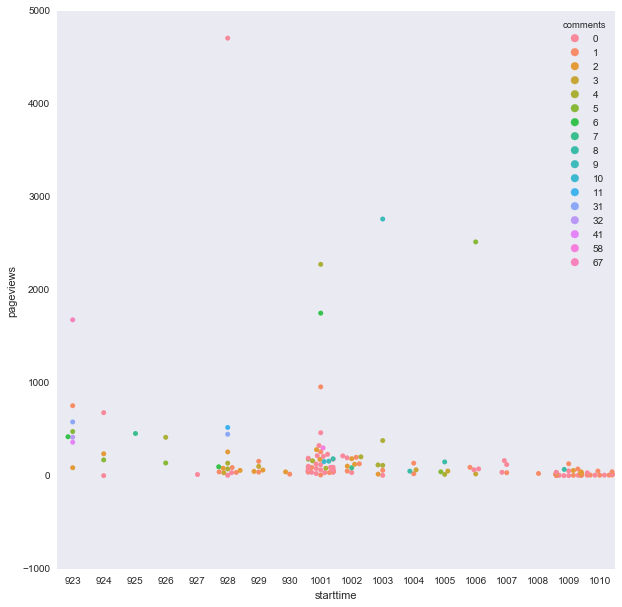

In [146]:
import matplotlib.pyplot as plt
%pylab inline
plt.figure(figsize=(10,10))
sns.swarmplot(x='starttime',y='pageviews',hue='comments',data=act_data)

In [152]:
reply_data=act_data[act_data['reply']==1]
reply_data.shape[0]

104

Populating the interactive namespace from numpy and matplotlib


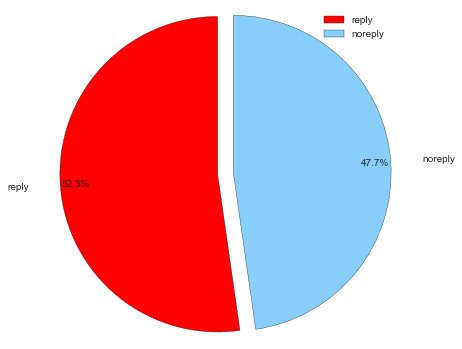

In [157]:
from matplotlib import pyplot as plt 
%pylab inline
plt.figure(figsize=(6,6))
labels = [u'reply',u'noreply']

sizes = [104,95]
colors = ['red','lightskyblue']

explode = (0.1,0)

patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.2,autopct = '%1.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.9)

for t in l_text:
    t.set_size=(80)
for t in p_text:
    t.set_size=(80)
plt.axis('equal')
plt.legend()
plt.show()

In [162]:
result=act_data[act_data['starttime']==1010]
result1=result['pageviews']
s=0
for i in result1:
    s+=i
print s

266


In [165]:
starttime=[]
pageviews=[]
for i in range(923,1011):#take care there can be changed
    result=act_data[act_data['starttime']==i]
    result1=result['pageviews']
    s=0
    if result.shape[0] != 0:
        starttime.append(i)
        for j in result1:
            s+=j
        pageviews.append(s)
data={'starttime':starttime,'pageviews':pageviews}
pageviews_data=pd.DataFrame(data)
pageviews_data

,pageviews,starttime
0,4769,923
1,1089,924
2,460,925
3,552,926
4,16,927
5,6616,928
6,406,929
7,60,930
8,10431,1001
9,1523,1002
